Marec 2015, J.Slavič in L.Knez

Vprašanje 1: Za sistem enačb: 
    $$
    \mathbf{A}=
    \begin{bmatrix}
    1 & -4 & 1\\
    1 & 6 & -1\\
    2 & -1 & 2
    \end{bmatrix}
    \qquad
    \mathbf{b}=
    \begin{bmatrix}
    7\\
    13\\
    5
    \end{bmatrix}
    $$

najdite rešitev s pomočjo ``SymPy``.

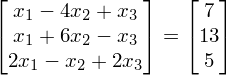

In [1]:
from sympy import *
init_printing()

# Definiramo simbolične spremenljivke
x1, x2, x3 = symbols('x1, x2, x3')

# Definiramo sistem
A = Matrix([[1, -4, 1],
            [1, 6, -1],
            [2, -1, 2]])
x = Matrix([[x1],
            [x2],
            [x3]])
b = Matrix([[7],
            [13],
            [5]])

eq = Eq(A*x,b)
eq

In [2]:
resitev = solve(eq,[x1, x2, x3])
resitev

Vprašanje 2: Za zgoraj definirano matriko $\mathbf{A}$ določite Evklidsko normo (lastni program).

In [3]:
# Pretvorimo podatke v np.array

import numpy as np
a = np.array(A).astype(float)   # Pazite, da spremenite v float, v osnovi je object
a

array([[ 1., -4.,  1.],
       [ 1.,  6., -1.],
       [ 2., -1.,  2.]])

In [4]:
# Hitra varianta

A_evk = np.sqrt(np.sum(a**2))
A_evk

In [5]:
# Pocasna varianta

vsota = 0
for vrstica in a:
    for element in vrstica:
        vsota += element**2
        
A_evk = vsota**0.5
A_evk
    

Vprašanje 3: Za zgoraj definirano matriko $\mathbf{A}$ določite neskončno normo (lastni program).

In [6]:
# Hitra varianta

A_oo = max(abs(a).sum(axis=1))
A_oo

In [7]:
# Pocasna varianta

vsota = zeros(1,3)
for i, vrstica in enumerate(a):
    vsota[i] = sum(abs(vrstica))

A_oo = max(vsota)
A_oo

Vprašanje 4: Za zgoraj definirano matriko $\mathbf{A}$ določite pogojenost (``numpy`` funkcija).

In [8]:
pogojenost = np.linalg.cond(a)
pogojenost

Vprašanje 5: Definirajte funkcijo ``gauss_elim``, ki za poljubno matriko $\mathbf{A}$ in vektor $\mathbf{b}$ izvede Gaussovo eliminacijo (posebej za matriko in posebej za vektor).

In [9]:
# Definiramo podatke
A_pod = np.array([[1, -4, 1],
                  [1, 6, -1],
                  [2, -1, 2]], dtype=float)
        
b_pod = np.array([[7],
                  [13],
                  [5]], dtype=float)

In [10]:
# Funkcija 
def gauss_elim(A, b):
    n = len(b)
    
    for k in range(0,n-1):    
        for i in range(k+1,n):   
            if A[i,k] != 0.0:
                faktor =  A[i,k]/A[k,k]                 
                A[i,k:n] = A[i,k:n] - faktor*A[k,k:n]   
                b[i] = b[i] - faktor*b[k]              
                
    
    return A, b
    

In [11]:
# Uporaba funkcije
[A, b] = gauss_elim(A_pod.copy(), b_pod.copy())

A

array([[  1. ,  -4. ,   1. ],
       [  0. ,  10. ,  -2. ],
       [  0. ,   0. ,   1.4]])

In [12]:
b

array([[  7. ],
       [  6. ],
       [-13.2]])

Vprašanje 6: Definirajte funkcijo ``gauss_elim_x``, ki za razultat funkcije ``gaus_elim`` najde ustrezne vrednosti vektorja $\textbf{x}$.

In [13]:
# Funkcija 
def gauss_elim_x(A, b):
    Ab = np.column_stack((A,b))   # Sestavimo v sistem Ab
    n = len(b)                    
    res = np.zeros(n)             # Pripravimo seznam ničel za rešitev
    
    for k, vrsta in enumerate(Ab[::-1]):  
        res[n-k-1] = (vrsta[-1] - np.dot(vrsta[n-k:-1], res[n-k:]) ) / (vrsta[n-k-1])
        
    
    return res

In [14]:
x = gauss_elim_x(A.copy(), b.copy())
x


array([ 11.28571429,  -1.28571429,  -9.42857143])

In [15]:
# Preverimo rešitev
ostanek = np.dot(A_pod,x) - b_pod.T
ostanek

array([[ -8.88178420e-16,   0.00000000e+00,  -2.66453526e-15]])